#### Comparing NW scores with Cosine Similarity

Are there pairs with low NW scores but high cosine similarity? If so, it suggests redundant ideas which are not captured in alignment scores.

In [3]:
import psycopg2
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import json
import random

database = 'fomc'
conn = psycopg2.connect("dbname=" + database + " user=abarciauskas")
cur = conn.cursor()

cosine_threshold = 0.1
sql = ("SELECT Doc1Id,Doc2Id,NwScore,CosineSimilarity FROM alignments LIMIT 10000")

cur.execute(sql)

alignments = cur.fetchall()
sample_size = 10000
rand_selection = [ alignments[i] for i in random.sample(xrange(len(alignments)), sample_size) ]
len(rand_selection)

10000

In [4]:
cosines = [float(alignment[3]) for alignment in rand_selection]
nw_scores = [alignment[2] for alignment in rand_selection]

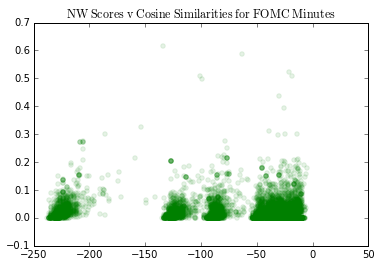

In [5]:
%matplotlib inline

plt.scatter(nw_scores, cosines, alpha=0.1, color = 'green')
plt.title(r'$\mathrm{NW\ Scores\ v\ Cosine\ Similarities\ for\ FOMC\ Minutes}$')
plt.plot()
plt.savefig('nw_scores_v_cosine_sims_' + database + '.png')